# **Importing Libraries**

In [ ]:
!pip install category_encoders

import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm

# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import KNNImputer 
# from sklearn.feature_extraction import FeatureHasher
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

#### Regression Libraries

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor


     |████████████████████████████████| 82 kB 439 kB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Data Loading**

In [ ]:
df_train=pd.read_csv("/content/drive/MyDrive/Colab_Datasets/Shiv Nagar University/train.csv")
x_test=pd.read_csv("/content/drive/MyDrive/Colab_Datasets/Shiv Nagar University/test.csv")


df_train.drop(columns=["Outlet_ID","Item_Type"],inplace=True)
x_test.drop(columns=["Outlet_ID","Item_Type"],inplace=True)

# **Preliminary Preprocessing**

In [ ]:
dependent_var="Sales"
datatype=df_train.dtypes
continous_list= datatype[(datatype == 'int64') | (datatype == 'float64')].index.tolist()
categorical_list= datatype[(datatype == 'object') | (datatype == 'categorical')].index.tolist()
nominal_list=[] # "Item_Type","Outlet_ID"
ordinal_list=["Outlet_Size","Outlet_Location_Type"]

print("(Continous Data) Integer or Float type of Data columns are:",continous_list)
print("(Categorical Data) object or categorical type of Data columns are:",categorical_list)
print("Nominal Data columns are:",nominal_list)
print("Ordinal Data columns are:",ordinal_list)


(Continous Data) Integer or Float type of Data columns are: ['Item_W', 'Item_MRP', 'Outlet_Year', 'Sales']
(Categorical Data) object or categorical type of Data columns are: ['Item_ID', 'Outlet_Size', 'Outlet_Location_Type']
Nominal Data columns are: []
Ordinal Data columns are: ['Outlet_Size', 'Outlet_Location_Type']


In [ ]:
df_train.head()

,Item_ID,Item_W,Item_MRP,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,197.352319,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,148.250214,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,205.465010,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,253.417583,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,240.871039,1988,Small,Tier 3,1739.769829


In [ ]:
df_train.drop(columns=["Item_ID"],inplace=True)

# **Outlier Analysis**

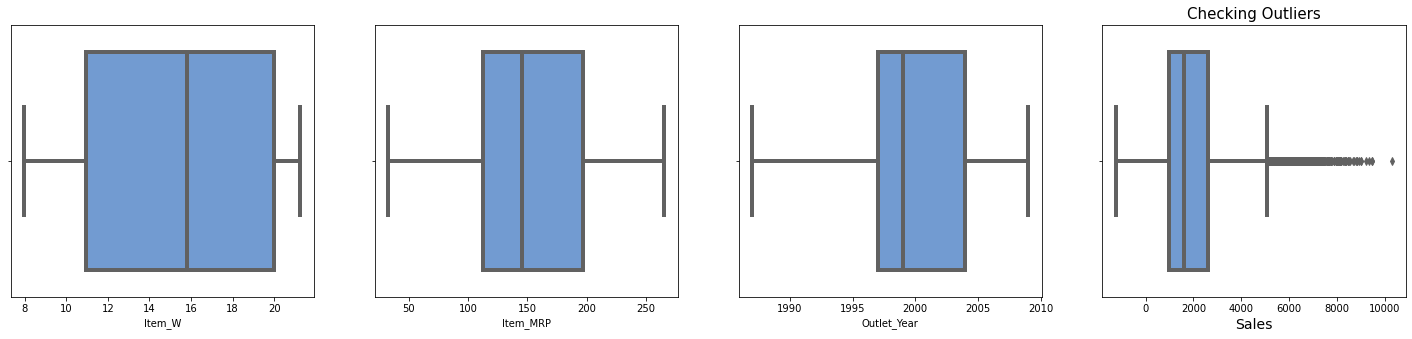

In [ ]:
warnings.simplefilter(action="ignore", category=FutureWarning)

fig,axs = plt.subplots(1,len(continous_list),figsize=(25, 5))
c=0

for num,i in enumerate(continous_list):
  # sns.distplot(df_train[i]) ## Visualizing distribution
  sns.boxplot(df_train[i],ax=axs[c],color = '#69d',linewidth=4,saturation=0.8, width=0.8, dodge=False) ## Visualizing Outliers
  plt.title('Checking Outliers', fontsize=15)
  plt.xlabel(i, fontsize=14)
  c=c+1

plt.show()

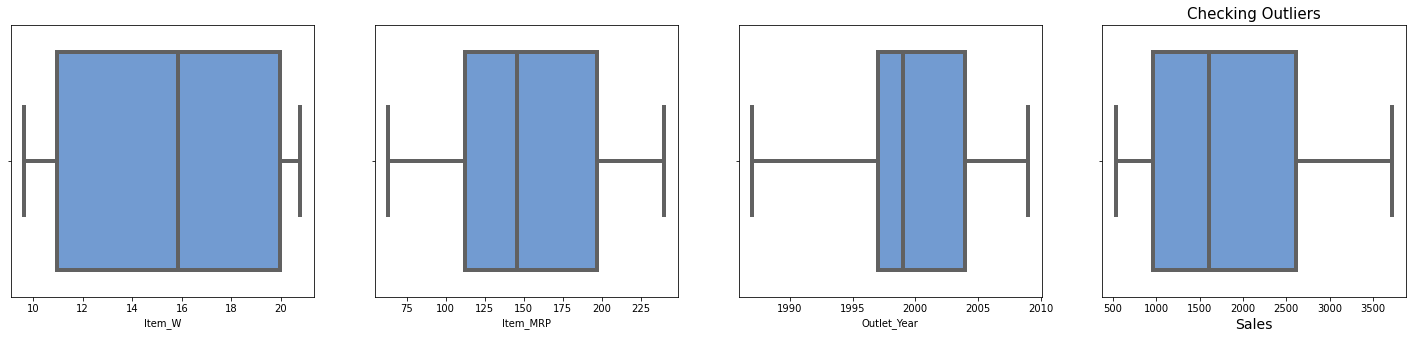

In [ ]:
for i in continous_list:
  upper_limit = df_train[i].quantile(0.90) ## Upper Limit
  lower_limit = df_train[i].quantile(0.10) ## Lower Limit
  df_train[i] = np.where(df_train[i] >= upper_limit,upper_limit,np.where(df_train[i] <= lower_limit,lower_limit,df_train[i]))

warnings.simplefilter(action="ignore", category=FutureWarning)

fig,axs = plt.subplots(1,len(continous_list),figsize=(25, 5))
c=0

for num,i in enumerate(continous_list):
  # sns.distplot(df_train[i]) ## Visualizing distribution
  sns.boxplot(df_train[i],ax=axs[c],color = '#69d',linewidth=4,saturation=0.8, width=0.8, dodge=False) ## Visualizing Outliers
  plt.title('Checking Outliers', fontsize=15)
  plt.xlabel(i, fontsize=14)
  c=c+1

plt.show()

# **Splitting ((Train--Val)) Data Sets**

---



In [ ]:
x=df_train.iloc[::,0:df_train.shape[1]-1] # Independent Vairables
y=df_train[[dependent_var]] # Dependent Vairable

x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2) # splitting inform of train and test sets.

train_data=pd.concat([x_train,y_train],axis=1)
test_data=pd.concat([x_val,y_val],axis=1)

x_train.shape,y_train.shape,x_val.shape,y_val.shape # Checking the shapes of the data

((70291, 5), (70291, 1), (17573, 5), (17573, 1))

# **Train Data-Preprocessing**

In [ ]:
train_data.head()

,Item_W,Item_MRP,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
66613,19.203643,100.859009,1997.0,Medium,Tier 2,2135.551074
25574,20.781314,135.656799,1996.0,Small,Tier 1,999.239565
19790,20.296902,102.576275,1997.0,Medium,Tier 3,1745.648680
20570,20.681596,63.278082,2009.0,Medium,Tier 3,1801.373649
11362,19.808735,123.643703,1999.0,Medium,Tier 3,3562.863526


In [ ]:
temp_df_1=pd.DataFrame(train_data.isnull().sum(),columns=["No of Null Values"])
temp_df_2=pd.DataFrame(train_data.dtypes,columns=["Vairbale Type"])
temp_df_3=pd.DataFrame(train_data.nunique(),columns=["No of Unique Values"])

nan_train_df=pd.concat([temp_df_1,temp_df_2,temp_df_3],axis=1)
nan_train_df

,No of Null Values,Vairbale Type,No of Unique Values
Item_W,0,float64,55897
Item_MRP,0,float64,56176
Outlet_Year,0,float64,12
Outlet_Size,0,object,3
Outlet_Location_Type,0,object,3
Sales,0,float64,56195


In [ ]:
cat_df=nan_train_df[(datatype == 'object') | (datatype == 'categorical')]
datatype=train_data.dtypes
print(datatype[(datatype == 'object') | (datatype == 'category')].index.tolist())
cat_df.drop(columns=["No of Null Values"])

['Outlet_Size', 'Outlet_Location_Type']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Vairbale Type,No of Unique Values
Outlet_Size,object,3
Outlet_Location_Type,object,3


In [ ]:
train_data.head()

,Item_W,Item_MRP,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
66613,19.203643,100.859009,1997.0,Medium,Tier 2,2135.551074
25574,20.781314,135.656799,1996.0,Small,Tier 1,999.239565
19790,20.296902,102.576275,1997.0,Medium,Tier 3,1745.648680
20570,20.681596,63.278082,2009.0,Medium,Tier 3,1801.373649
11362,19.808735,123.643703,1999.0,Medium,Tier 3,3562.863526


In [ ]:
## Nominal Encoding
for i in nominal_list:
  temp_df1=pd.get_dummies(train_data[i],drop_first=True) ## Dummy Vairable Trap -- (N-1): Regression; N: Classification
  train_data=pd.concat([temp_df1,train_data],axis=1)
  train_data.drop(columns=[i],inplace=True)

le=LabelEncoder()
for i in ordinal_list:
  train_data[i]=le.fit_transform(train_data[i])

In [ ]:
train_data.info()
x_train=train_data.iloc[::,0:train_data.shape[1]-1]
y_train=train_data[[dependent_var]]
print(x_train.shape,y_train.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70291 entries, 66613 to 76770
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_W                70291 non-null  float64
 1   Item_MRP              70291 non-null  float64
 2   Outlet_Year           70291 non-null  float64
 3   Outlet_Size           70291 non-null  int64  
 4   Outlet_Location_Type  70291 non-null  int64  
 5   Sales                 70291 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 3.8 MB
(70291, 5) (70291, 1)


In [ ]:
x_train.head()

,Item_W,Item_MRP,Outlet_Year,Outlet_Size,Outlet_Location_Type
66613,19.203643,100.859009,1997.0,1,1
25574,20.781314,135.656799,1996.0,2,0
19790,20.296902,102.576275,1997.0,1,2
20570,20.681596,63.278082,2009.0,1,2
11362,19.808735,123.643703,1999.0,1,2


# **Val Data--Preprocessing**

In [ ]:
test_data.head()

,Item_W,Item_MRP,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
4261,19.987102,206.879663,1987.0,Medium,Tier 3,2091.550970
48986,9.648708,157.724218,1987.0,Small,Tier 1,2741.031335
75588,12.795054,240.085414,1987.0,Small,Tier 2,1113.299166
62267,10.806741,174.703722,1997.0,Small,Tier 2,1996.231870
27699,11.915981,195.269633,1997.0,Small,Tier 1,1418.525980


In [ ]:
temp_df_1=pd.DataFrame(test_data.isnull().sum(),columns=["No of Null Values"])
temp_df_2=pd.DataFrame(test_data.dtypes,columns=["Vairbale Type"])
temp_df_3=pd.DataFrame(test_data.nunique(),columns=["No of Unique Values"])

nan_test_df=pd.concat([temp_df_1,temp_df_2,temp_df_3],axis=1)
nan_test_df

,No of Null Values,Vairbale Type,No of Unique Values
Item_W,0,float64,13979
Item_MRP,0,float64,14086
Outlet_Year,0,float64,12
Outlet_Size,0,object,3
Outlet_Location_Type,0,object,3
Sales,0,float64,14032


In [ ]:
cat_df=nan_train_df[(datatype == 'object') | (datatype == 'categorical')]
datatype=test_data.dtypes
print(datatype[(datatype == 'object') | (datatype == 'category')].index.tolist())
cat_df.drop(columns=["No of Null Values"])

['Outlet_Size', 'Outlet_Location_Type']


,Vairbale Type,No of Unique Values
Outlet_Size,object,3
Outlet_Location_Type,object,3


In [ ]:
for i in nominal_list:
  temp_df1=pd.get_dummies(test_data[i],drop_first=True) ## Dummy Vairable Trap -- (N-1): Regression; N: Classification
  test_data=pd.concat([temp_df1,test_data],axis=1)
  test_data.drop(columns=[i],inplace=True)

le=LabelEncoder()
for i in ordinal_list:
  test_data[i]=le.fit_transform(test_data[i])

In [ ]:
test_data.info()
x_val=test_data.iloc[::,0:test_data.shape[1]-1]
y_val=test_data[[dependent_var]]
print(x_val.shape,y_val.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17573 entries, 4261 to 2882
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_W                17573 non-null  float64
 1   Item_MRP              17573 non-null  float64
 2   Outlet_Year           17573 non-null  float64
 3   Outlet_Size           17573 non-null  int64  
 4   Outlet_Location_Type  17573 non-null  int64  
 5   Sales                 17573 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 961.0 KB
(17573, 5) (17573, 1)


In [ ]:
x_val.head()

,Item_W,Item_MRP,Outlet_Year,Outlet_Size,Outlet_Location_Type
4261,19.987102,206.879663,1987.0,1,2
48986,9.648708,157.724218,1987.0,2,0
75588,12.795054,240.085414,1987.0,2,1
62267,10.806741,174.703722,1997.0,2,1
27699,11.915981,195.269633,1997.0,2,0


# **Feature Scaling** **--Train & Test**

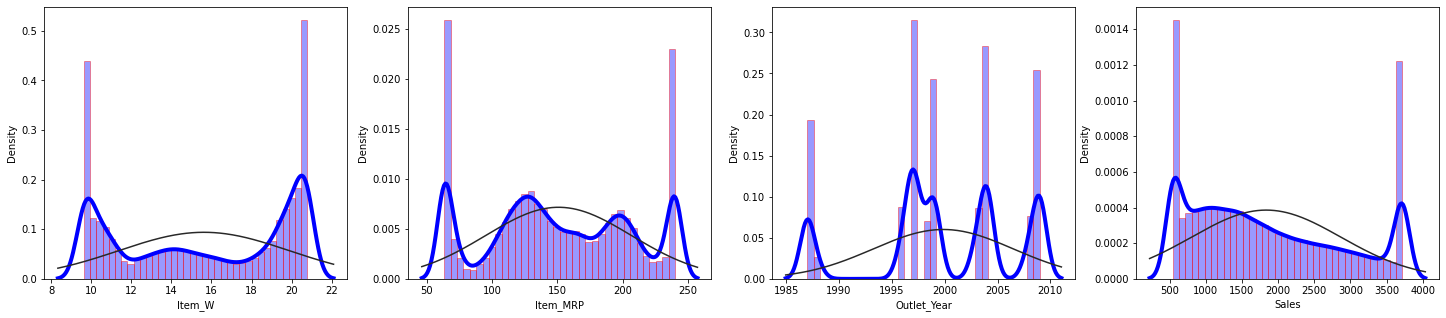

In [ ]:
fig,axs = plt.subplots(1,len(continous_list),figsize=(25, 5))

c=0
for num,i in enumerate(continous_list):
  sns.distplot(df_train[i], hist=True, kde=True, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'red'},kde_kws={'linewidth': 4},ax=axs[c],fit=norm)
  c=c+1
plt.show()

In [ ]:
x_train.drop(columns=["Outlet_Year"],inplace=True)
x_val.drop(columns=["Outlet_Year"],inplace=True)

In [ ]:
mmax_norm=MinMaxScaler(feature_range=(0,1))
x_train[["Item_W","Item_MRP"]]=mmax_norm.fit_transform(x_train[["Item_W","Item_MRP"]])
x_val[["Item_W","Item_MRP"]]=mmax_norm.fit_transform(x_val[["Item_W","Item_MRP"]])

# **Modelling**

In [ ]:
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
dr = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
svr = SVR(kernel = 'rbf')
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(n_estimators=200)
rfg=RandomForestRegressor((n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)

In [ ]:
model_list = [(lr, 'Linear Regression'),(ls, 'Lasso'),(rd, 'Ridge'),(dr, 'Decission Tree Reg'), (gbr,"Gradient Boosting Regression"),(xgb,"XGBoost"),(rfg,"RandomForestRegressor")]

for item in model_list:
    model = item[0]
    name = item[1]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    error = round(np.sqrt(mean_squared_error(y_val, y_pred)),2)
    print (f'Root mean squared error using {name}is {error}')
    print ('-'*100)

Root mean squared error using Linear Regressionis 1035.62
----------------------------------------------------------------------------------------------------
Root mean squared error using Lassois 1035.65
----------------------------------------------------------------------------------------------------
Root mean squared error using Ridgeis 1035.62
----------------------------------------------------------------------------------------------------
Root mean squared error using Decission Tree Regis 1455.3
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Root mean squared error using Gradient Boosting Regressionis 1031.25
----------------------------------------------------------------------------------------------------
[19:46:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root mean squared error using XGBoostis 1033.43
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Root mean squared error using RandomForestRegressoris 1134.05
----------------------------------------------------------------------------------------------------


# **Complete Training Data**

In [ ]:
# **Complete Training Data**
temp_df_1=pd.DataFrame(df_train.isnull().sum(),columns=["No of Null Values"])
temp_df_2=pd.DataFrame(df_train.dtypes,columns=["Vairbale Type"])
temp_df_3=pd.DataFrame(df_train.nunique(),columns=["No of Unique Values"])

nan_train_df=pd.concat([temp_df_1,temp_df_2,temp_df_3],axis=1)
nan_train_df

,No of Null Values,Vairbale Type,No of Unique Values
Item_W,0,float64,69788
Item_MRP,0,float64,70248
Outlet_Year,0,float64,12
Outlet_Size,0,object,3
Outlet_Location_Type,0,object,3
Sales,0,float64,70201


In [ ]:
cat_df=nan_train_df[(datatype == 'object') | (datatype == 'categorical')]
datatype=df_train.dtypes
print(datatype[(datatype == 'object') | (datatype == 'category')].index.tolist())
cat_df.drop(columns=["No of Null Values"])

['Outlet_Size', 'Outlet_Location_Type']


,Vairbale Type,No of Unique Values
Outlet_Size,object,3
Outlet_Location_Type,object,3


In [ ]:
for i in nominal_list:
  temp_df1=pd.get_dummies(df_train[i],drop_first=True) ## Dummy Vairable Trap -- (N-1): Regression; N: Classification
  df_train=pd.concat([temp_df1,df_train],axis=1)
  df_train.drop(columns=[i],inplace=True)

le=LabelEncoder()
for i in ordinal_list:
  df_train[i]=le.fit_transform(df_train[i])

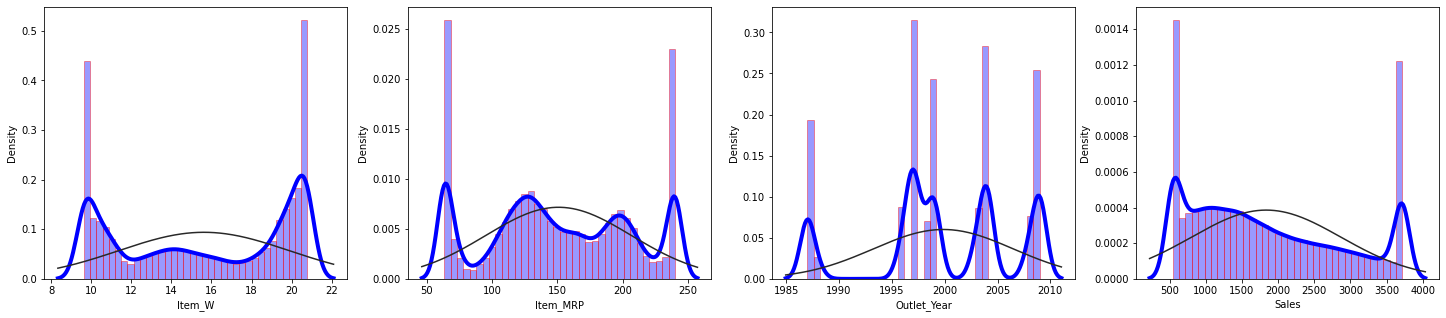

In [ ]:
fig,axs = plt.subplots(1,len(continous_list),figsize=(25, 5))

c=0
for num,i in enumerate(continous_list):
  sns.distplot(df_train[i], hist=True, kde=True, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'red'},kde_kws={'linewidth': 4},ax=axs[c],fit=norm)
  c=c+1
plt.show()

In [ ]:
df_train.drop(columns=["Outlet_Year"],inplace=True)


In [ ]:
mmax_norm=MinMaxScaler(feature_range=(0,1))
df_train[["Item_W","Item_MRP"]]=mmax_norm.fit_transform(df_train[["Item_W","Item_MRP"]])

In [ ]:
x=df_train.iloc[::,0:df_train.shape[1]-1]
y=df_train[[dependent_var]]

In [ ]:
cv_model_list=[lr,ls,rd,gbr,xgb,rfg]
cv_model_dict={lr:"Linear Regression",ls:"Lasso Regression",rd:"Ridge Regression",gbr:"Gradient Boosting Regression",xgb:"XGBoost",rfg:"Random forest Regression"}

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import mean_squared_error

cv = KFold(n_splits=10, random_state=1, shuffle=True)
temp=None

for i in cv_model_list:
  for item in cv_model_dict: 
    if i==item:
      temp=cv_model_dict[item]
      break

  scores = cross_val_score(i, x, y, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

  print("Average Error of Model :",temp,":",np.sqrt(np.mean(np.absolute(scores))))
  print("Maximum Model error :",temp,":",np.sqrt(np.max(np.absolute(scores))))
  print("Minimum Model error :",temp,":",np.sqrt(np.min(np.absolute(scores))))
  print("Standard Deviation of Model error :",temp,":",np.sqrt(np.std(np.absolute(scores))))
  print(' ')
  print(' ')


Average Error of Model : Linear Regression : 1032.3713187201167
Maximum Model error : Linear Regression : 1043.327233047896
Minimum Model error : Linear Regression : 1023.9207855915722
Standard Deviation of Model error : Linear Regression : 105.5479500205518
 
 
Average Error of Model : Lasso Regression : 1032.368749095019
Maximum Model error : Lasso Regression : 1043.3362683994283
Minimum Model error : Lasso Regression : 1023.9051510638216
Standard Deviation of Model error : Lasso Regression : 105.6729766031658
 
 
Average Error of Model : Ridge Regression : 1032.3713157740262
Maximum Model error : Ridge Regression : 1043.327229119638
Minimum Model error : Ridge Regression : 1023.9207853900323
Standard Deviation of Model error : Ridge Regression : 105.54797418963543
 
 
Average Error of Model : Gradient Boosting Regression : 1028.9274553945932
Maximum Model error : Gradient Boosting Regression : 1039.611080421168
Minimum Model error : Gradient Boosting Regression : 1021.5938104275292


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Average Error of Model : Random forest Regression : 1128.1450498997867
Maximum Model error : Random forest Regression : 1138.4380280777862
Minimum Model error : Random forest Regression : 1119.972849474284
Standard Deviation of Model error : Random forest Regression : 115.57981059615952
 
 


# **Test-Data Submission**

In [ ]:
Item_ID=x_test[["Item_ID"]]
x_test.drop(columns=["Item_ID"],inplace=True)

In [ ]:
temp_df_1=pd.DataFrame(x_test.isnull().sum(),columns=["No of Null Values"])
temp_df_2=pd.DataFrame(x_test.dtypes,columns=["Vairbale Type"])
temp_df_3=pd.DataFrame(x_test.nunique(),columns=["No of Unique Values"])

nan_test_df=pd.concat([temp_df_1,temp_df_2,temp_df_3],axis=1)
nan_test_df

,No of Null Values,Vairbale Type,No of Unique Values
Item_W,0,float64,36812
Item_MRP,0,float64,37585
Outlet_Year,0,int64,12
Outlet_Size,0,object,3
Outlet_Location_Type,0,object,3


In [ ]:
cat_df=nan_train_df[(datatype == 'object') | (datatype == 'categorical')]
datatype=test_data.dtypes
print(datatype[(datatype == 'object') | (datatype == 'category')].index.tolist())
cat_df.drop(columns=["No of Null Values"])

[]


,Vairbale Type,No of Unique Values
Outlet_Size,object,3
Outlet_Location_Type,object,3


In [ ]:
for i in nominal_list:
  temp_df1=pd.get_dummies(x_test[i],drop_first=True) ## Dummy Vairable Trap -- (N-1): Regression; N: Classification
  x_test=pd.concat([temp_df1,x_test],axis=1)
  x_test.drop(columns=[i],inplace=True)

le=LabelEncoder()
for i in ordinal_list:
  x_test[i]=le.fit_transform(x_test[i])

In [ ]:
x_test

,Item_W,Item_MRP,Outlet_Year,Outlet_Size,Outlet_Location_Type
0,10.156725,119.319482,1999,0,2
1,10.434425,263.600449,1987,0,2
2,11.953589,246.286990,1997,0,0
3,14.948546,136.200508,2004,1,1
4,11.080042,173.145664,2009,1,2
...,...,...,...,...,...
37651,6.380000,178.334400,2009,1,2
37652,6.650000,150.073400,2009,1,2
37653,5.655000,147.510200,1997,2,0
37654,6.675000,92.946200,2009,1,2


In [ ]:
x_test.drop(columns=["Outlet_Year"],inplace=True)

In [ ]:
mmax_norm=MinMaxScaler(feature_range=(0,1))
x_test[["Item_W","Item_MRP"]]=mmax_norm.fit_transform(x_test[["Item_W","Item_MRP"]])

In [ ]:
model=GradientBoostingRegressor(random_state=42)
model.fit(x,y)
y_pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred=pd.DataFrame(y_pred,columns=["Sales"])

In [ ]:
y_pred

,Sales
0,1904.529544
1,1999.690982
2,1947.807061
3,1926.567852
4,1687.426245
...,...
37651,1672.917724
37652,1672.917724
37653,1863.414147
37654,1651.652596


In [ ]:
Item_ID=pd.DataFrame(Item_ID,columns=["Item_ID"])

In [ ]:
Final=pd.concat([Item_ID,y_pred],axis=1)
Final

,Item_ID,Sales
0,DRM23,1904.529544
1,FDG47,1999.690982
2,FDN21,1947.807061
3,FDZ23,1926.567852
4,FDC16,1687.426245
...,...,...
37651,FDY27,1672.917724
37652,FDK38,1672.917724
37653,DRF01,1863.414147
37654,FDR58,1651.652596


In [ ]:
Final.to_csv("/content/drive/MyDrive/Colab_Datasets/Shiv Nagar University/Final.csv")